# Introduction
Parkinson's Disease (PD) is a progressive neurological disorder that affects movement. Understanding the factors associated with PD can aid in early diagnosis and management of the disease. This analysis explores a dataset containing various health and demographic attributes of patients to uncover insights into Parkinson's Disease.

# Purpose of the Analysis
The goals of this analysis are:

* Explore: Understand the distribution and relationships of features related to Parkinson's Disease.
* Preprocess: Clean and preprocess the data for machine learning modeling.
* Model: Develop machine learning models to predict Parkinson's Disease diagnosis.
* Evaluate: Assess model performance and identify key predictors of the disease.

# Data Loading and Overview

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, skew, ttest_ind, f_oneway
from sklearn.preprocessing import LabelEncoder, StandardScaler, PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import PowerTransformer

In [3]:
# Reading Data Into Pandas Dataframe
df = pd.read_csv("/content/parkinsons_disease_data.csv")

In [4]:
pd.set_option('display.max_rows', None)  # To display all rows
pd.set_option('display.max_columns', None)  # To display all columns

In [5]:
# Exploring Dataset Content
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryParkinsons,TraumaticBrainInjury,Hypertension,Diabetes,Depression,Stroke,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,UPDRS,MoCA,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis,DoctorInCharge
0,3058,85,0,3,1,19.619878,0,5.108241,1.380660,3.893969,9.283194,0,0,0,0,0,0,129,60,222.842278,148.125623,37.867776,337.307114,6.458713,29.181289,1.572427,1,0,0,0,0,0,0,0,DrXXXConfid
1,3059,75,0,0,2,16.247339,1,6.027648,8.409804,8.513428,5.602470,0,0,0,0,0,0,163,76,210.501133,153.756463,77.228117,264.635521,37.306703,12.332639,4.787551,0,1,0,1,0,1,0,1,DrXXXConfid
2,3060,70,1,0,0,15.368239,0,2.242135,0.213275,6.498805,9.929824,0,0,0,1,0,0,113,93,287.387996,118.702600,85.588304,395.662649,67.838170,29.927783,2.130686,1,0,0,0,1,0,1,1,DrXXXConfid
3,3061,52,0,0,0,15.454557,0,5.997788,1.375045,6.715033,4.196189,0,0,0,0,0,0,146,78,280.339546,136.299186,51.869626,362.189688,52.964696,21.304268,3.391288,1,1,1,0,0,0,1,1,DrXXXConfid
4,3062,87,0,0,1,18.616042,0,9.775243,1.188607,4.657572,9.363925,0,0,0,0,0,0,115,94,284.014151,108.449452,25.069418,149.956586,21.804880,8.336364,3.200969,0,0,0,1,0,1,0,0,DrXXXConfid


In [6]:
df.tail()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryParkinsons,TraumaticBrainInjury,Hypertension,Diabetes,Depression,Stroke,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,UPDRS,MoCA,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis,DoctorInCharge
2100,5158,87,1,0,2,38.483841,0,12.674393,5.325900,5.947278,6.296231,0,0,1,0,0,0,92,98,191.372707,98.730980,93.269555,161.291730,187.887925,28.634010,8.076254,1,0,0,0,1,1,0,0,DrXXXConfid
2101,5159,67,0,0,1,33.694396,1,0.977018,0.108599,4.825187,6.342325,1,0,0,0,0,0,103,96,150.188647,112.063230,47.524626,240.086616,172.325253,13.106537,1.665751,0,0,0,1,0,1,1,1,DrXXXConfid
2102,5160,65,0,0,2,22.829631,0,6.152286,5.775103,0.334244,9.740019,1,0,0,1,0,1,168,79,159.351155,61.543591,72.765698,222.231014,111.851581,26.527734,4.785614,0,0,0,0,1,1,0,1,DrXXXConfid
2103,5161,61,1,0,0,16.871030,1,0.292094,2.280475,9.598513,8.289390,0,0,0,0,0,0,129,97,232.240473,53.029891,99.945560,167.980928,144.474453,19.873404,8.378979,1,0,1,0,0,1,1,1,DrXXXConfid
2104,5162,56,0,0,2,16.569934,0,1.985084,1.400441,9.883835,9.930037,0,0,0,0,0,0,99,76,190.053027,133.026760,20.252050,194.476929,30.797680,12.192612,5.015131,0,0,0,0,1,0,1,0,DrXXXConfid


In [7]:
print('Number of Features In Dataset :', df.shape[1])
print('Number of Instances In Dataset : ', df.shape[0])

Number of Features In Dataset : 35
Number of Instances In Dataset :  2105


In [8]:
# Get the statistical summary of the numerical features
df.describe()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryParkinsons,TraumaticBrainInjury,Hypertension,Diabetes,Depression,Stroke,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,UPDRS,MoCA,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis
count,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000
mean,4110.000000,69.601900,0.492637,0.692637,1.337292,27.209493,0.296437,10.040413,5.016674,4.912901,6.996639,0.145843,0.106413,0.145843,0.148219,0.205226,0.048931,133.719715,90.249881,226.860840,126.147858,59.670352,222.940500,101.415318,15.094314,4.989694,0.431829,0.252732,0.207601,0.138717,0.295012,0.245131,0.296912,0.619477
std,607.805479,11.594511,0.500065,1.003827,0.895840,7.208099,0.456795,5.687014,2.890919,2.872115,1.753065,0.353033,0.308439,0.353033,0.355401,0.403962,0.215775,26.502355,17.061488,43.589406,43.407036,23.370920,101.895822,56.591448,8.643014,2.933877,0.495449,0.434682,0.405686,0.345733,0.456156,0.430267,0.457006,0.485631
min,3058.000000,50.000000,0.000000,0.000000,0.000000,15.008333,0.000000,0.002228,0.004157,0.000011,4.000497,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,90.000000,60.000000,150.062698,50.022828,20.027981,50.113604,0.028441,0.021191,0.001505,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3584.000000,60.000000,0.000000,0.000000,1.000000,20.782176,0.000000,5.150278,2.455703,2.478503,5.488864,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,110.000000,75.000000,189.385178,88.841960,39.538643,132.520174,53.048148,7.517160,2.415890,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4110.000000,70.000000,0.000000,0.000000,1.000000,27.184571,0.000000,10.070337,5.031550,4.825187,6.929819,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,133.000000,91.000000,228.528256,126.884570,59.343357,222.802452,102.561023,14.963574,4.983227,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,4636.000000,80.000000,1.000000,1.000000,2.000000,33.462452,1.000000,14.829565,7.512795,7.381487,8.558719,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,157.000000,105.000000,264.608100,163.912782,79.366628,311.699109,149.831682,22.608362,7.484220,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,5162.000000,89.000000,1.000000,3.000000,3.000000,39.999887,1.000000,19.988866,9.995255,9.995864,9.999821,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,179.000000,119.000000,299.963074,199.985981,99.982265,399.975022,198.953604,29.970107,9.992697,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [40]:
df.columns

Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
       'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'FamilyHistoryParkinsons', 'TraumaticBrainInjury',
       'Hypertension', 'Diabetes', 'Depression', 'Stroke', 'SystolicBP',
       'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'UPDRS', 'MoCA', 'FunctionalAssessment',
       'Tremor', 'Rigidity', 'Bradykinesia', 'PosturalInstability',
       'SpeechProblems', 'SleepDisorders', 'Constipation', 'Diagnosis'],
      dtype='object')

In [46]:
df.iloc[1].tolist()

[3059.0,
 75.0,
 0.0,
 0.0,
 2.0,
 16.24733915647557,
 1.0,
 6.027648029307635,
 8.409804050283633,
 8.513428249596062,
 5.602469505671129,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 163.0,
 76.0,
 210.50113288438223,
 153.75646266126938,
 77.22811692033076,
 264.63552148532744,
 37.306702734053545,
 12.332639294887883,
 4.787551288506763,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0]

In [9]:
# Get the summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105 entries, 0 to 2104
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   PatientID                 2105 non-null   int64  
 1   Age                       2105 non-null   int64  
 2   Gender                    2105 non-null   int64  
 3   Ethnicity                 2105 non-null   int64  
 4   EducationLevel            2105 non-null   int64  
 5   BMI                       2105 non-null   float64
 6   Smoking                   2105 non-null   int64  
 7   AlcoholConsumption        2105 non-null   float64
 8   PhysicalActivity          2105 non-null   float64
 9   DietQuality               2105 non-null   float64
 10  SleepQuality              2105 non-null   float64
 11  FamilyHistoryParkinsons   2105 non-null   int64  
 12  TraumaticBrainInjury      2105 non-null   int64  
 13  Hypertension              2105 non-null   int64  
 14  Diabetes

# Data Preprocessing

In [10]:
# Check for missing values
df.isnull().sum()

,0
PatientID,0
Age,0
Gender,0
Ethnicity,0
EducationLevel,0
BMI,0
Smoking,0
AlcoholConsumption,0
PhysicalActivity,0
DietQuality,0


In [11]:
# Check for duplicates and remove them
df.duplicated().sum()

np.int64(0)

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df = df.drop('DoctorInCharge', axis=1)
df = df.drop('PatientID', axis=1)
#drop DoctorInCharge and PatientID column since it has no effect on the prediction

In [14]:
# Detect and remove outliers using IQR
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

numerical_columns = [
    'Age', 'BMI', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal',
    'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'UPDRS',
    'MoCA', 'FunctionalAssessment'
]

data = remove_outliers(df, numerical_columns)

In [15]:
# Check and normalize skewed numerical features
def check_and_normalize(df, columns):
    pt = PowerTransformer(method='yeo-johnson')
    for col in columns:
        skewness = skew(df[col])
        if abs(skewness) > 0.5:
            df[col] = pt.fit_transform(df[col].values.reshape(-1, 1))
    return df

# Normalize numerical features
data = check_and_normalize(data, numerical_columns)

In [16]:
# Encode categorical variables
label_encoders = {}
categorical_columns = [
    'Gender', 'Ethnicity', 'EducationLevel', 'Smoking', 'AlcoholConsumption',
    'PhysicalActivity', 'DietQuality', 'SleepQuality', 'FamilyHistoryParkinsons',
    'TraumaticBrainInjury', 'Hypertension', 'Diabetes', 'Depression', 'Stroke',
    'Tremor', 'Rigidity', 'Bradykinesia', 'PosturalInstability', 'SpeechProblems',
    'SleepDisorders', 'Constipation']

for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [17]:
# Scale numerical features
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Exploratory Data Analysis (EDA)

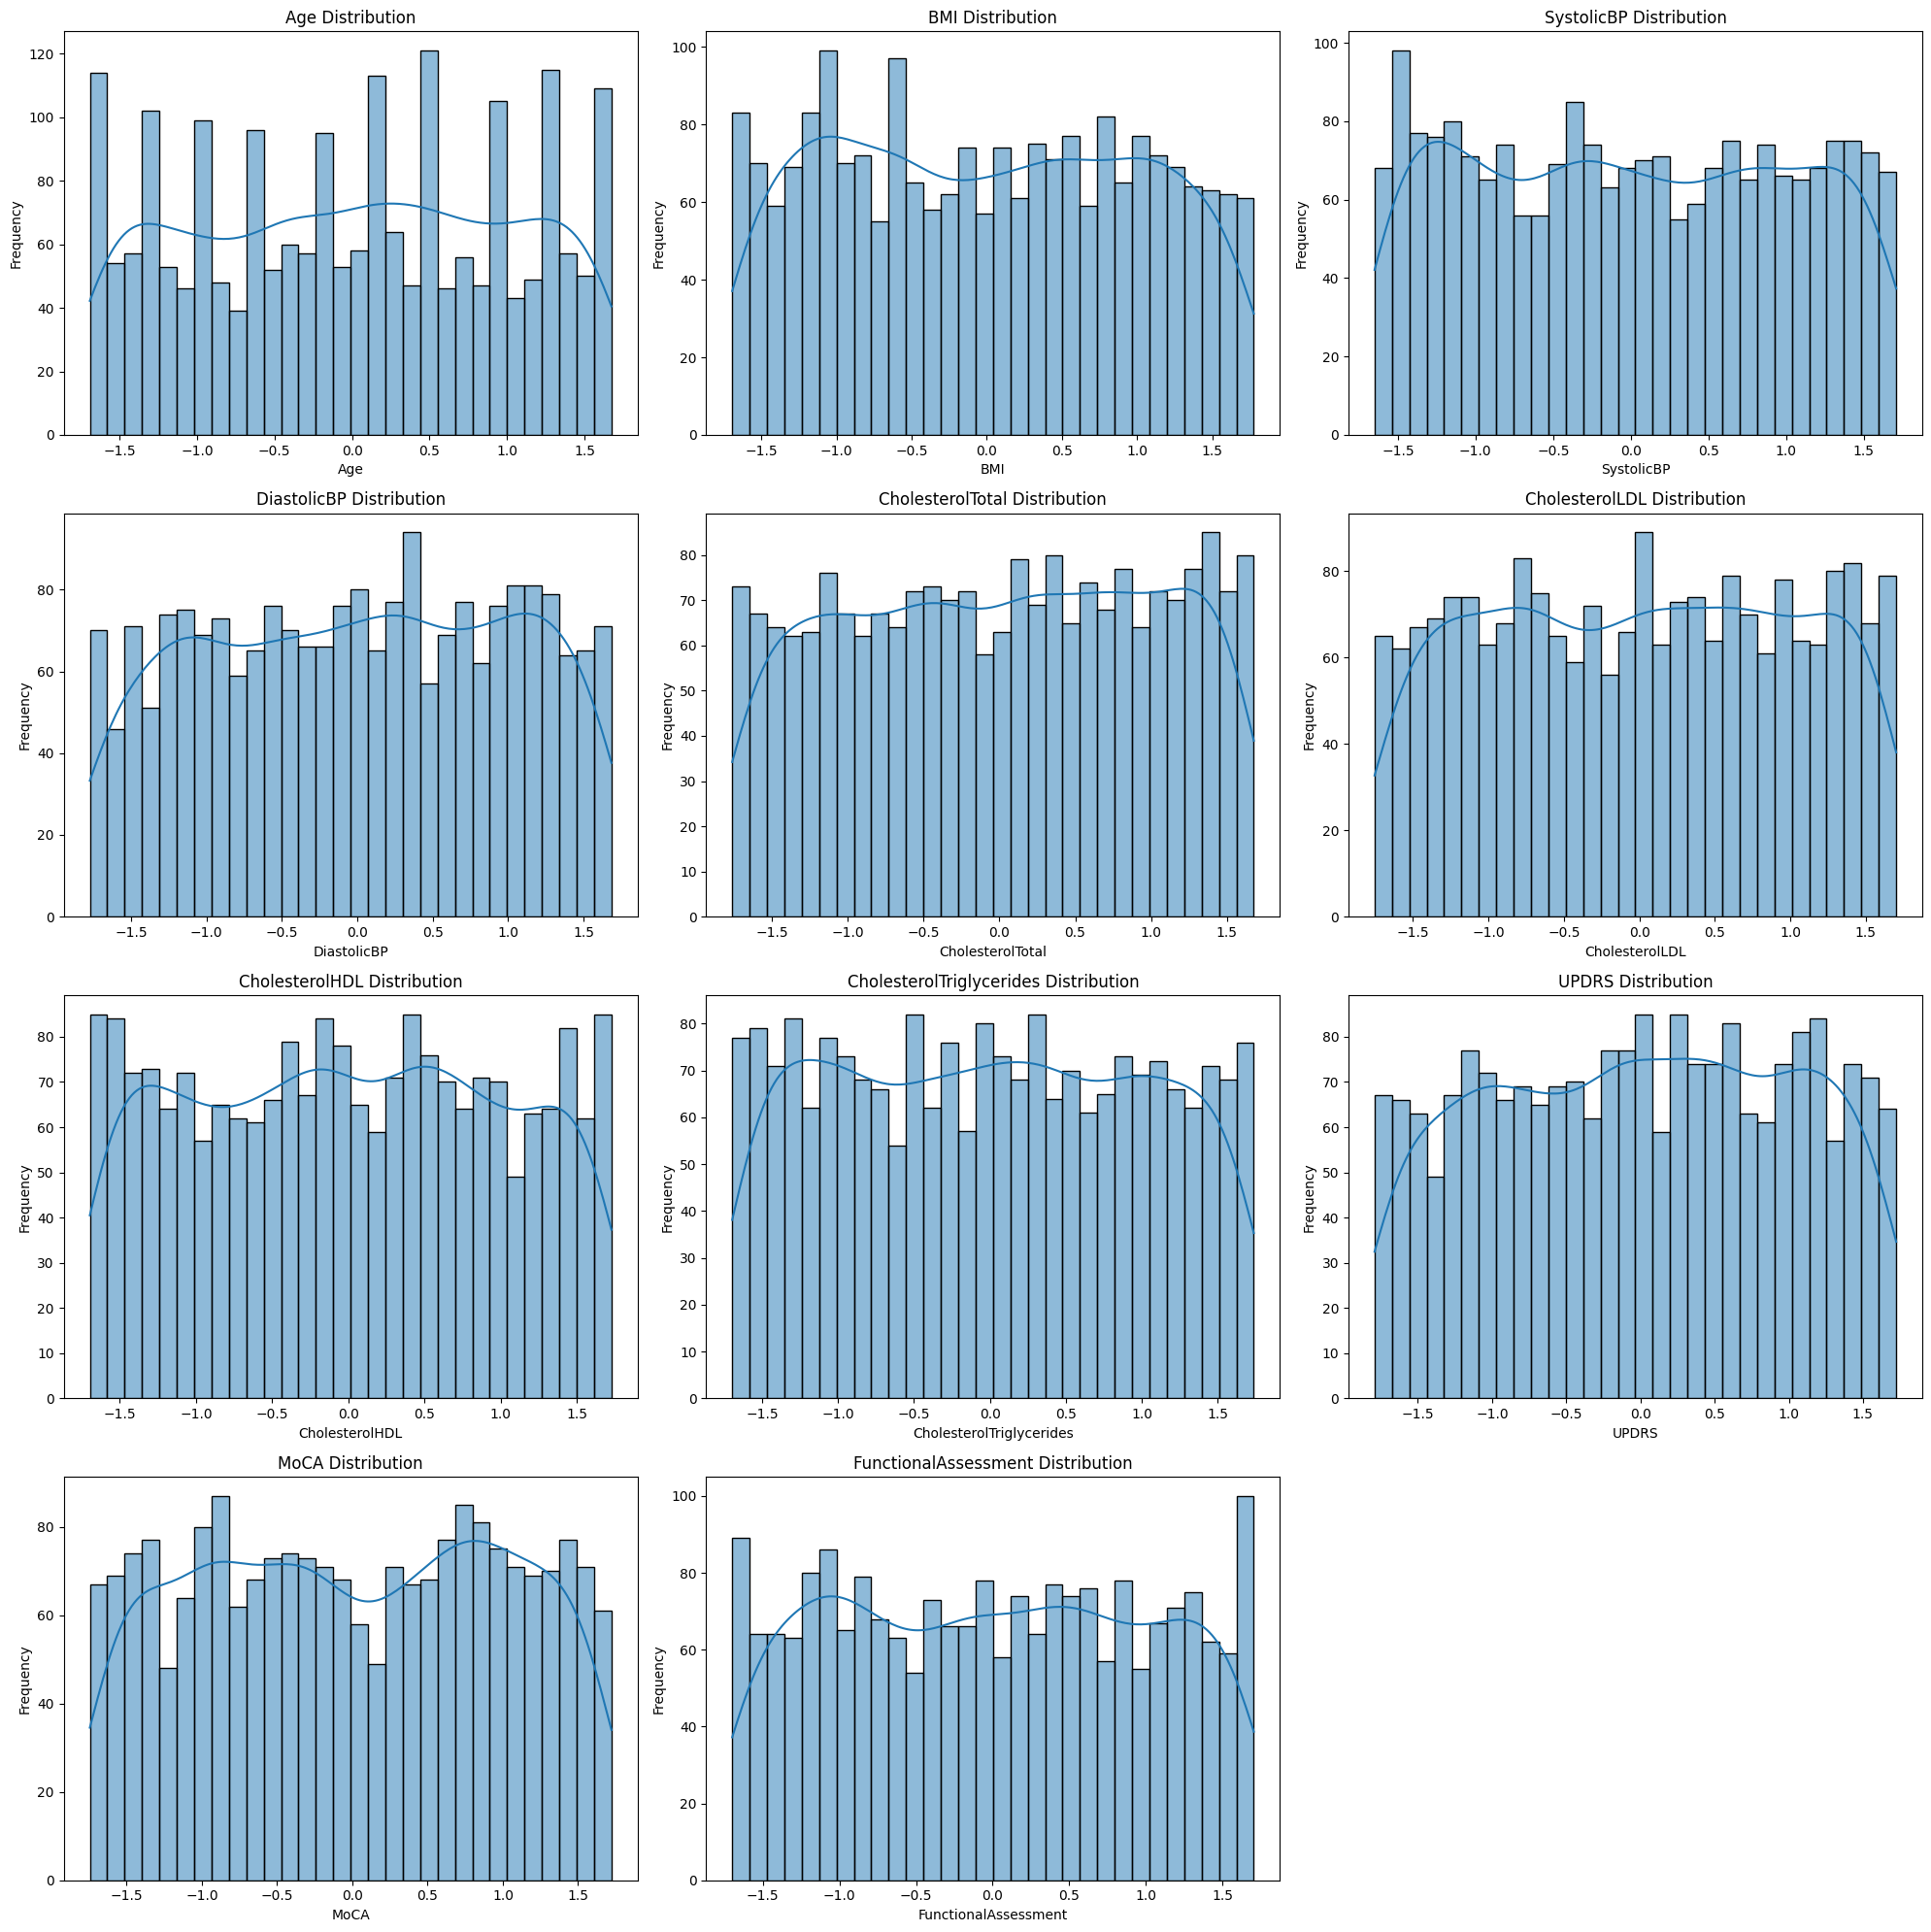

In [92]:
# Distribution plots for numerical features
plt.figure(figsize=(20, 20))
for i, col in enumerate(numerical_columns):
    plt.subplot(4, 3, i + 1)
    sns.histplot(data[col], bins=30, kde=True)
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

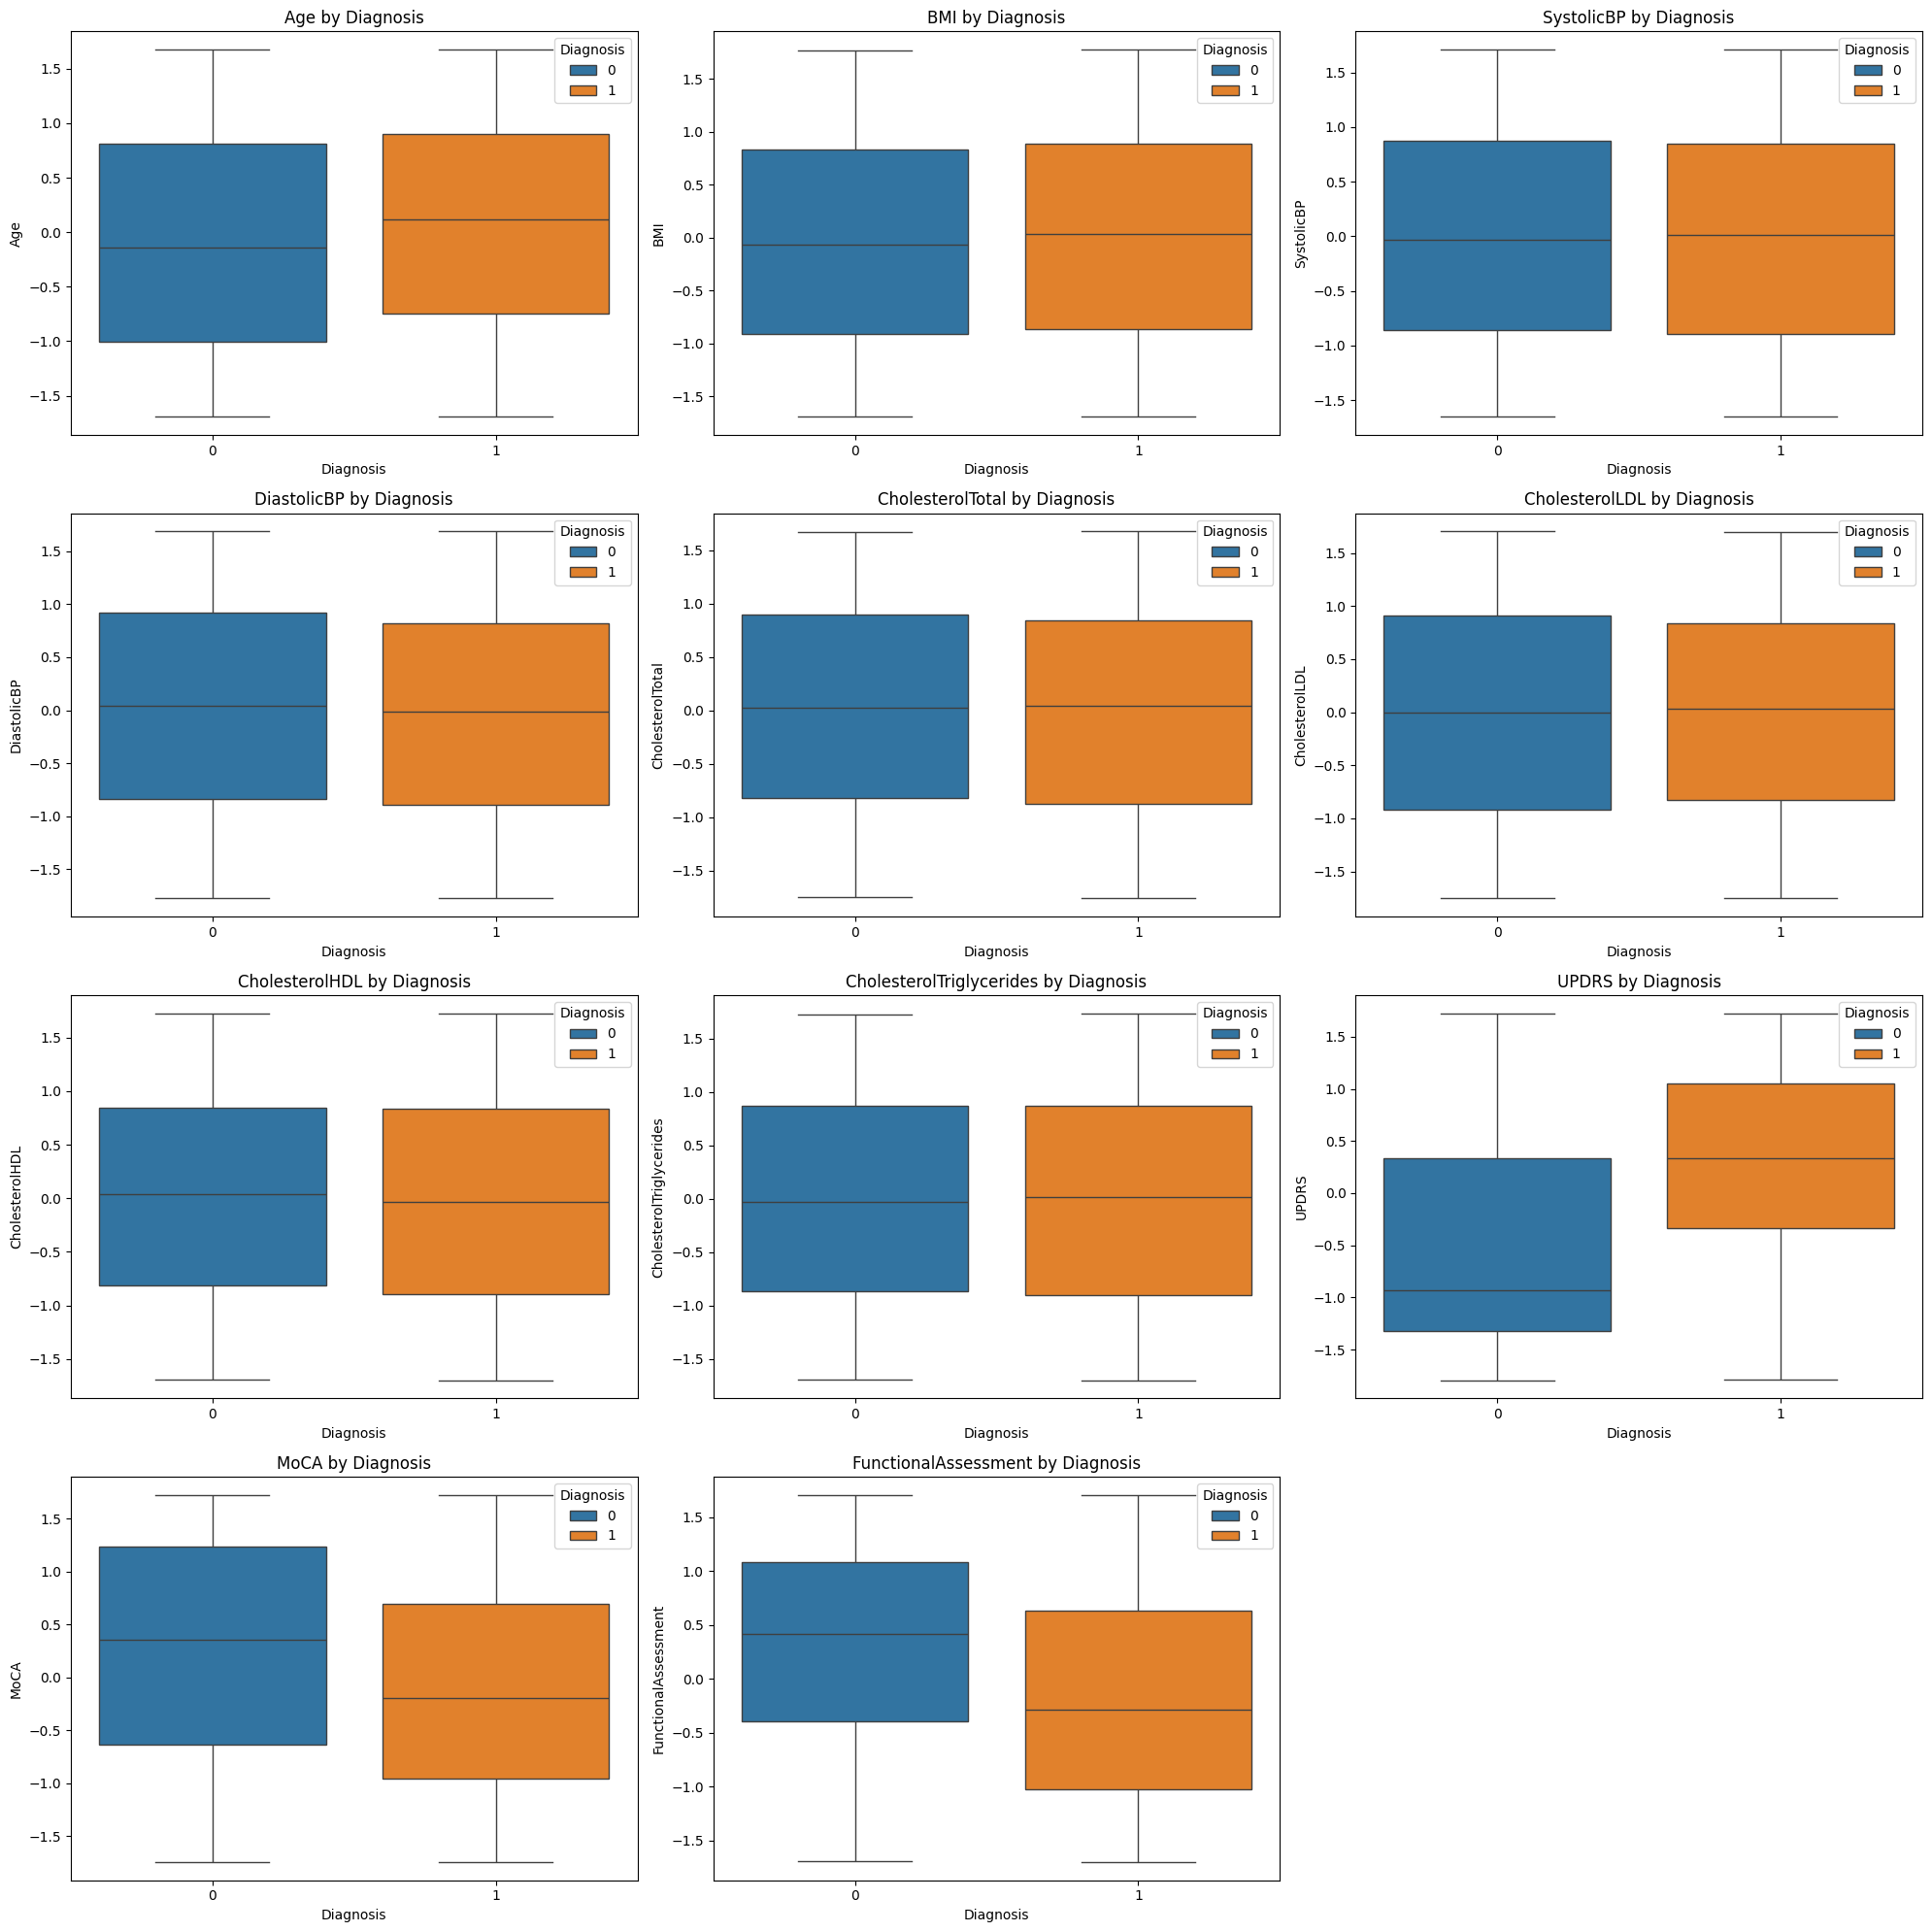

In [215]:
# Box plots for numerical features grouped by Diagnosis
plt.figure(figsize=(20, 20))
for i, col in enumerate(numerical_columns):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(x='Diagnosis', y=col, data=data, hue='Diagnosis', palette='tab10')
    plt.title(f'{col} by Diagnosis')
    plt.xlabel('Diagnosis')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

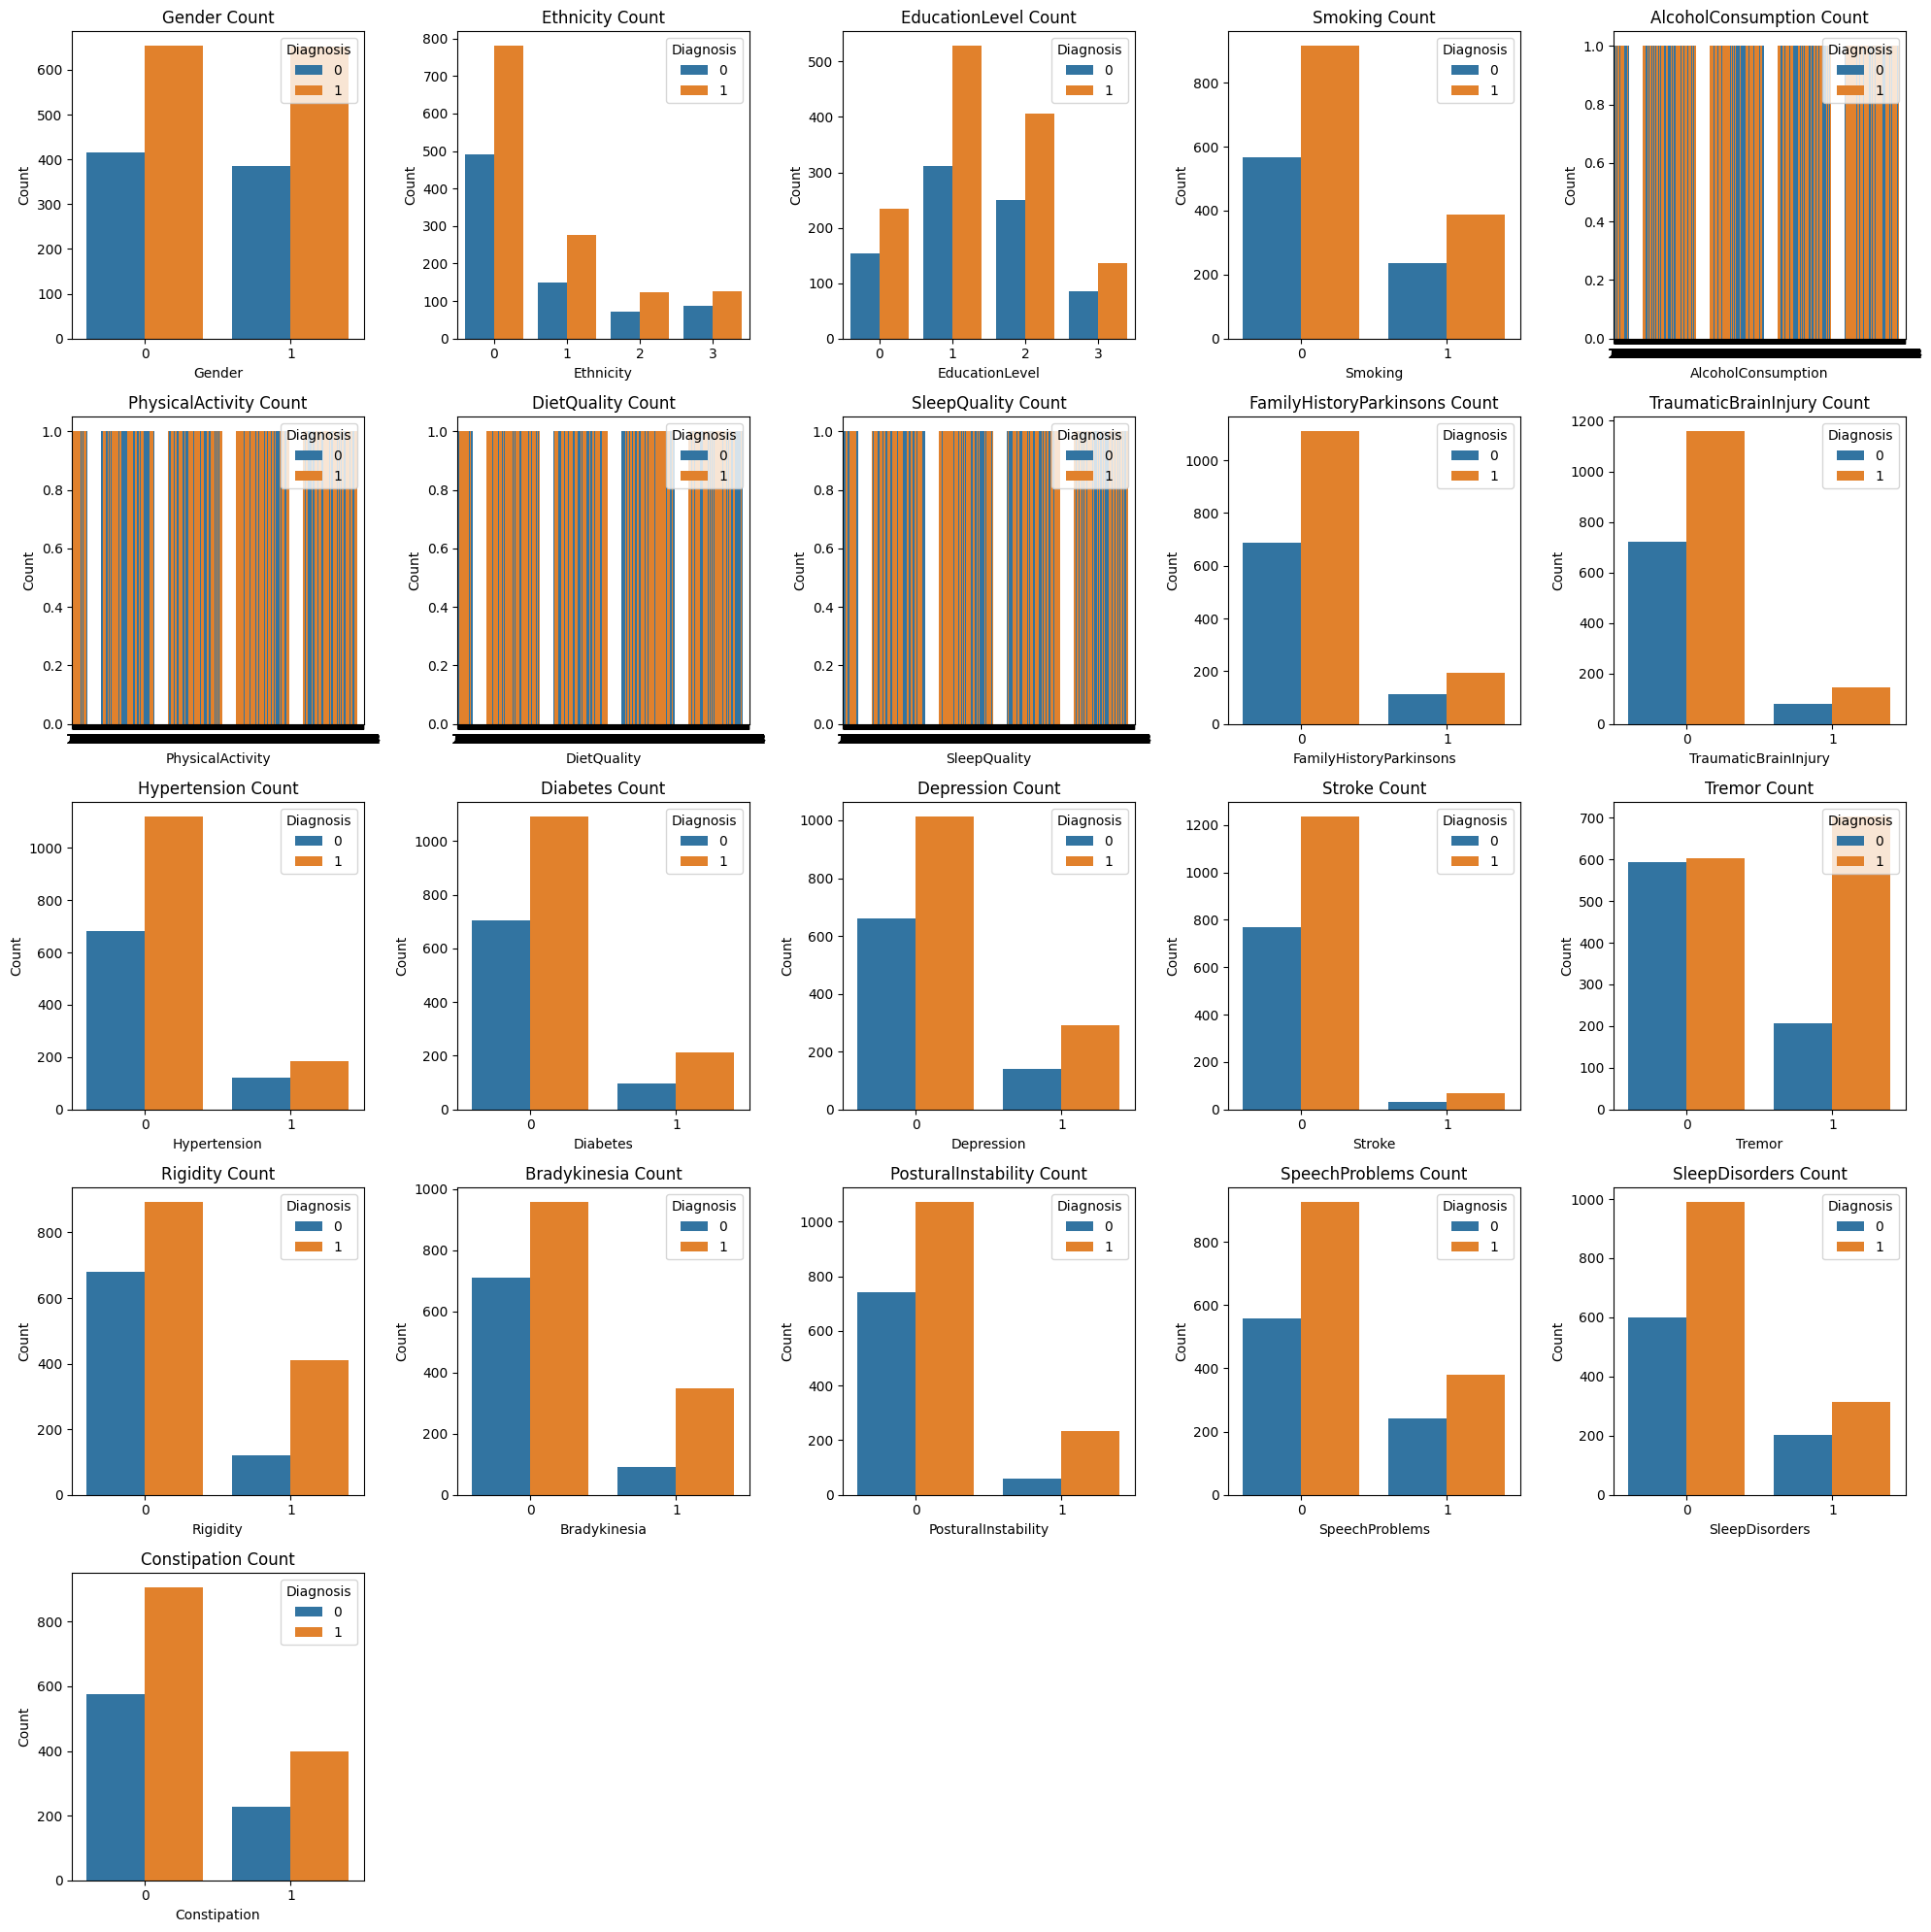

In [216]:
# Count plots for categorical features
categorical_columns = [
    'Gender', 'Ethnicity', 'EducationLevel', 'Smoking', 'AlcoholConsumption',
    'PhysicalActivity', 'DietQuality', 'SleepQuality', 'FamilyHistoryParkinsons',
    'TraumaticBrainInjury', 'Hypertension', 'Diabetes', 'Depression', 'Stroke',
    'Tremor', 'Rigidity', 'Bradykinesia', 'PosturalInstability', 'SpeechProblems',
    'SleepDisorders', 'Constipation']

plt.figure(figsize=(20, 20))

for i, col in enumerate(categorical_columns):
    plt.subplot(5, 5, i + 1)
    sns.countplot(x=col, data=data, hue='Diagnosis', palette='tab10')
    plt.title(f'{col} Count')
    plt.xlabel(col)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

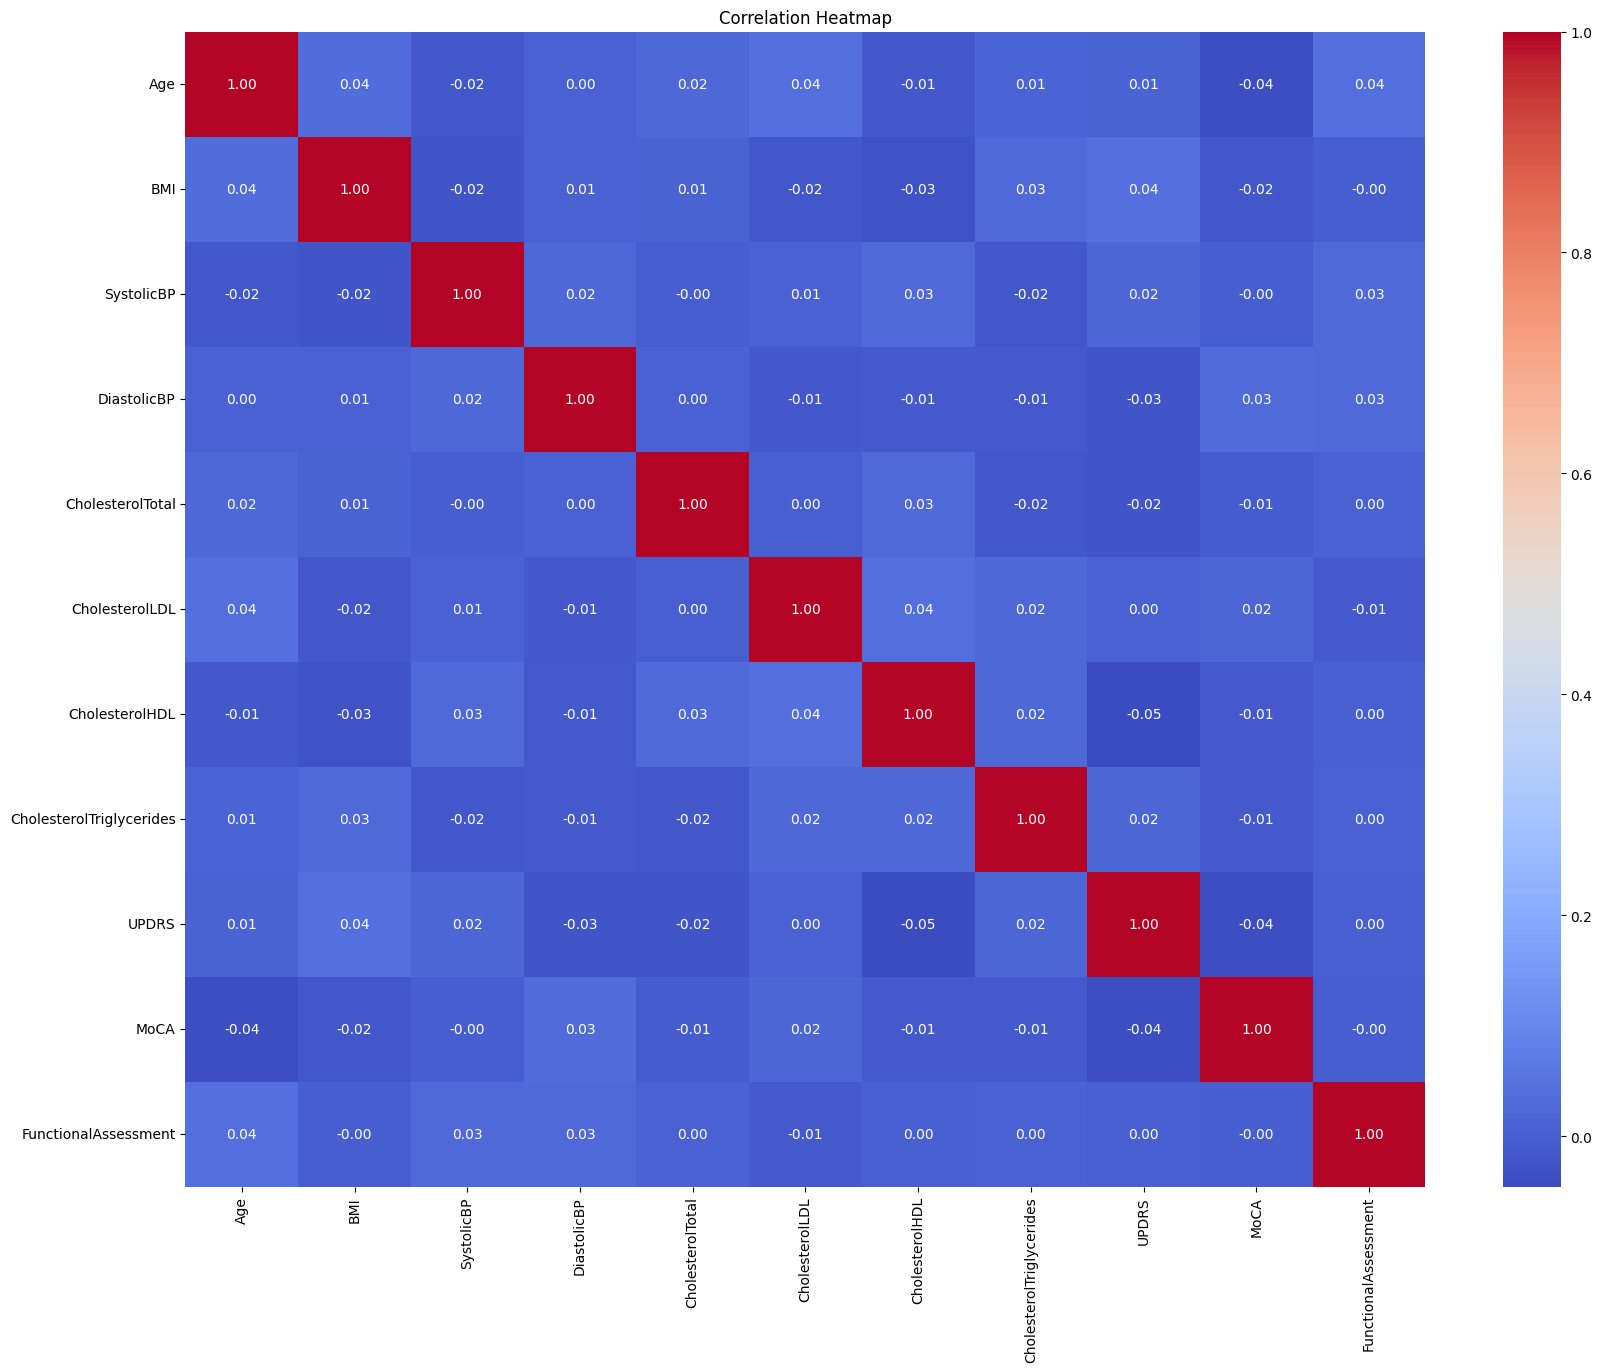

In [217]:
# Correlation Heatmap
plt.figure(figsize=(20, 15))
numeric_data = data[numerical_columns]
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Machine Learning

In [18]:
# Extracting Features Into Features & Target
X = data.drop(['Diagnosis'], axis=1)
y = data['Diagnosis']

print('Feature (X) Shape Before Balancing :', X.shape)
print('Target (y) Shape Before Balancing :', y.shape)

Feature (X) Shape Before Balancing : (2105, 33)
Target (y) Shape Before Balancing : (2105,)


In [19]:
# Exploring Imabalance In Dataset
y.value_counts() #data before resampling

,count
Diagnosis,
1,1304
0,801


In [20]:
from imblearn.over_sampling import SMOTE

In [21]:
# Intialising SMOTE Object
sm = SMOTE(random_state=300)

In [22]:
# Resampling Data
X, y = sm.fit_resample(X, y)

In [23]:
y.value_counts() #data after resampling

,count
Diagnosis,
0,1304
1,1304


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Machine Learning Model Training
In this section, we have trained the following Machine Learning Models:

* Logistic Regression
* Decision Tree
* Random Forest Classifier
* SVM
* Gradient Boosting

**Logistic Regression**

In [25]:
logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(X_train, y_train)

predlog = logmodel.predict(X_test)

print(classification_report(y_test, predlog))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       252
           1       0.85      0.83      0.84       270

    accuracy                           0.84       522
   macro avg       0.84      0.84      0.84       522
weighted avg       0.84      0.84      0.84       522



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


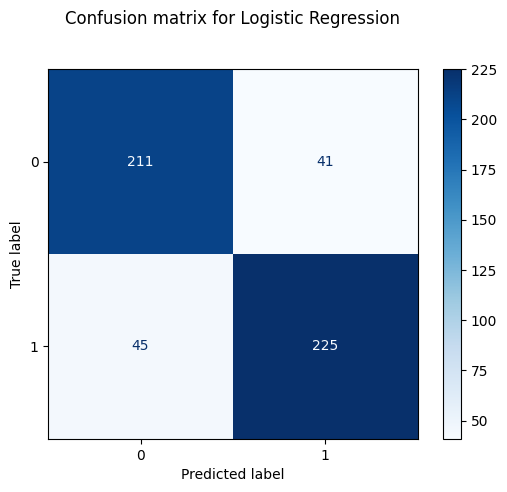

In [26]:
ConfusionMatrixDisplay.from_estimator(logmodel, X_test, y_test, cmap=plt.cm.Blues)
plt.title('Confusion matrix for Logistic Regression', y=1.1)
plt.show()

**Decision Tree Classifier**

In [27]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
predDT = clf.predict(X_test)

print(classification_report(y_test, predDT))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       252
           1       0.90      0.86      0.88       270

    accuracy                           0.88       522
   macro avg       0.88      0.88      0.88       522
weighted avg       0.88      0.88      0.88       522



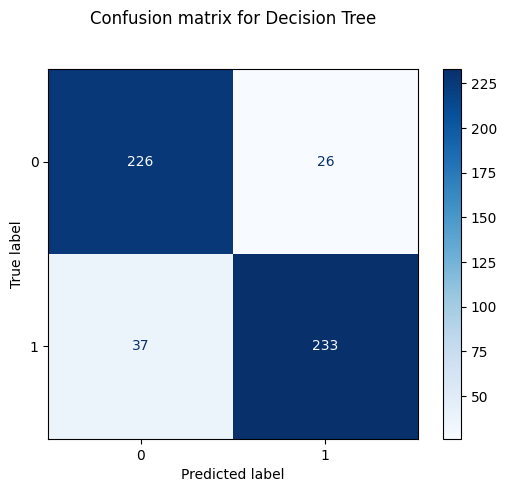

In [28]:
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, cmap=plt.cm.Blues)
plt.title('Confusion matrix for Decision Tree', y=1.1)
plt.show()

**Random Forest Classifier**

In [29]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
predRF = rfc.predict(X_test)

print(classification_report(y_test, predRF))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       252
           1       0.93      0.93      0.93       270

    accuracy                           0.92       522
   macro avg       0.92      0.92      0.92       522
weighted avg       0.92      0.92      0.92       522



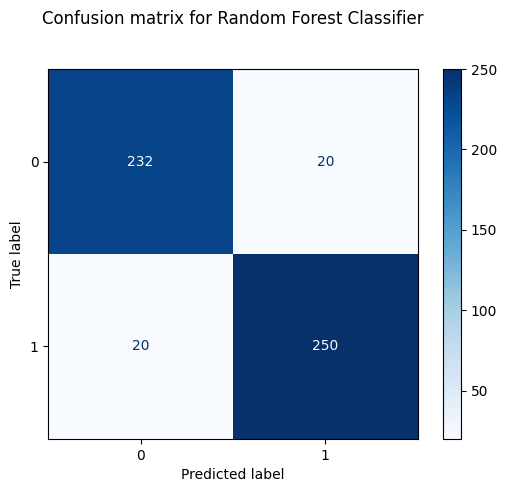

In [30]:
ConfusionMatrixDisplay.from_estimator(rfc, X_test, y_test, cmap=plt.cm.Blues)
plt.title('Confusion matrix for Random Forest Classifier', y=1.1)
plt.show()

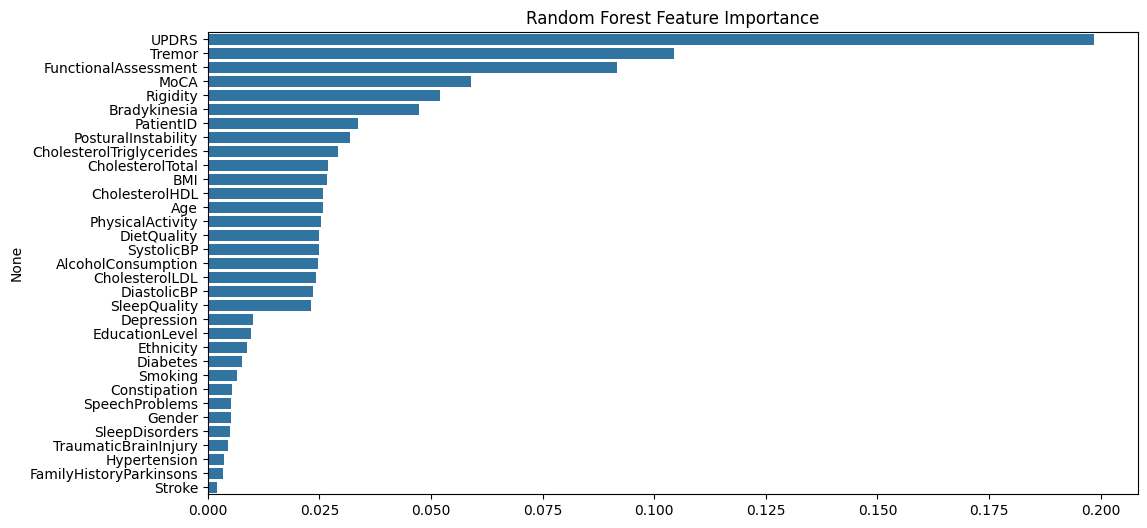

In [31]:
importances = rfc.feature_importances_
feat_names = X.columns
sorted_idx = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
sns.barplot(x=importances[sorted_idx], y=feat_names[sorted_idx])
plt.title("Random Forest Feature Importance")
plt.show()


**SVM**

In [32]:
# Create and train the SVM model
svm = SVC(probability=True)  # You can specify kernel='linear', 'rbf', etc.
svm.fit(X_train, y_train)

# Make predictions
predSVM = svm.predict(X_test)

# Print classification report
print(classification_report(y_test, predSVM))

              precision    recall  f1-score   support

           0       0.51      0.58      0.54       252
           1       0.55      0.48      0.51       270

    accuracy                           0.53       522
   macro avg       0.53      0.53      0.53       522
weighted avg       0.53      0.53      0.53       522



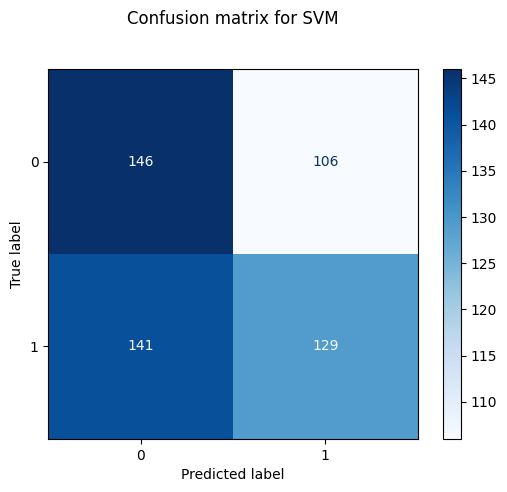

In [33]:
ConfusionMatrixDisplay.from_estimator(svm, X_test, y_test, cmap=plt.cm.Blues)
plt.title('Confusion matrix for SVM', y=1.1)
plt.show()

In [34]:
chart = {
    'Metric': ["Accuracy", "Precision", "Recall", "F1 Score", "ROC-AUC"],
    'Decision Tree': [
        accuracy_score(y_test, predDT),
        precision_score(y_test, predDT),
        recall_score(y_test, predDT),
        f1_score(y_test, predDT),
        roc_auc_score(y_test, predDT)
    ],
    'Random Forest': [
        accuracy_score(y_test, predRF),
        precision_score(y_test, predRF),
        recall_score(y_test, predRF),
        f1_score(y_test, predRF),
        roc_auc_score(y_test, predRF)
    ],
    'Logistic Regression': [
        accuracy_score(y_test, predlog),
        precision_score(y_test, predlog),
        recall_score(y_test, predlog),
        f1_score(y_test, predlog),
        roc_auc_score(y_test, predlog)
    ],
    'SVM': [
        accuracy_score(y_test, predSVM),
        precision_score(y_test, predSVM),
        recall_score(y_test, predSVM),
        f1_score(y_test, predSVM),
        roc_auc_score(y_test, predSVM)
    ]
}

# Create DataFrame and transpose for better readability
chart = pd.DataFrame(chart)


In [39]:
display(chart)

,Metric,Decision Tree,Random Forest,Logistic Regression,SVM
0,Accuracy,0.879310,0.923372,0.835249,0.526820
1,Precision,0.899614,0.925926,0.845865,0.548936
2,Recall,0.862963,0.925926,0.833333,0.477778
3,F1 Score,0.880907,0.925926,0.839552,0.510891
4,ROC-AUC,0.879894,0.923280,0.835317,0.528571


These results demonstrate promising predictive capabilities of the models for identifying Parkinson's Disease based on the dataset. Further refinement and validation on larger datasets could enhance model robustness and applicability in clinical settings.

# Conclusion
After conducting comprehensive analysis and modeling on the Parkinson's Disease dataset, several insights were gained:

Exploratory Data Analysis (EDA) revealed significant correlations between certain health metrics (such as BMI, cholesterol levels) and Parkinson's Disease.
Statistical tests indicated notable differences in these health metrics between patients with and without Parkinson's Disease, suggesting potential biomarkers.
Machine Learning Models were trained and evaluated to predict Parkinson's Disease diagnosis. Here are the performance metrics of each model:

In [ ]:
# # -*- coding: utf-8 -*-
# """streamlit_app

# Automatically generated by Colab.

# Original file is located at
#     https://colab.research.google.com/drive/1TnigFZ76AcFdeD4xGy1_zPVljpioWDES
# """

# # streamlit_app.py
# import streamlit as st
# import pandas as pd
# import numpy as np
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.preprocessing import LabelEncoder, StandardScaler, PowerTransformer
# from sklearn.model_selection import train_test_split
# from imblearn.over_sampling import SMOTE

# @st.cache_resource
# def load_model_and_features():
#     # Load and preprocess data
#     df = pd.read_csv('parkinsons_disease_data.csv')
#     df.drop_duplicates(inplace=True)
#     df.drop("DoctorInCharge", axis=1, inplace=True)
#     df.drop("PatientID", axis=1, inplace=True)

#     numerical_columns = [
#         'Age', 'BMI', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal',
#         'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'UPDRS',
#         'MoCA', 'FunctionalAssessment'
#     ]

#     categorical_columns = [
#         'Gender', 'Ethnicity', 'EducationLevel', 'Smoking', 'AlcoholConsumption',
#         'PhysicalActivity', 'DietQuality', 'SleepQuality', 'FamilyHistoryParkinsons',
#         'TraumaticBrainInjury', 'Hypertension', 'Diabetes', 'Depression', 'Stroke',
#         'Tremor', 'Rigidity', 'Bradykinesia', 'PosturalInstability', 'SpeechProblems',
#         'SleepDisorders', 'Constipation'
#     ]

#     # Remove outliers using IQR
#     for col in numerical_columns:
#         Q1 = df[col].quantile(0.25)
#         Q3 = df[col].quantile(0.75)
#         IQR = Q3 - Q1
#         lower_bound = Q1 - 1.5 * IQR
#         upper_bound = Q3 + 1.5 * IQR
#         df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

#     # Normalize skewed data
#     pt = PowerTransformer(method='yeo-johnson')
#     for col in numerical_columns:
#         if abs(df[col].skew()) > 0.5:
#             df[col] = pt.fit_transform(df[col].values.reshape(-1, 1))

#     # Encode categoricals
#     label_encoders = {}
#     for col in categorical_columns:
#         le = LabelEncoder()
#         df[col] = le.fit_transform(df[col])
#         label_encoders[col] = le

#     # Standardize numerical features
#     scaler = StandardScaler()
#     df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

#     # Split data
#     X = df.drop("Diagnosis", axis=1)
#     y = df["Diagnosis"]

#     sm = SMOTE(random_state=300)
#     X_resampled, y_resampled = sm.fit_resample(X, y)

#     X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

#     # Train model
#     model = RandomForestClassifier()
#     model.fit(X_train, y_train)

#     return model, numerical_columns, categorical_columns, scaler, label_encoders, pt


# # Streamlit UI
# st.title("🧠 Parkinson’s Disease Prediction App")

# st.write("Enter the values for each feature below:")

# # Load cached model and column names
# model, numerical_columns, categorical_columns, scaler, label_encoders = load_model_and_features()

# st.subheader("Enter your medical and demographic information below:")

# feature_names = [ 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
#        'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
#        'SleepQuality', 'FamilyHistoryParkinsons', 'TraumaticBrainInjury',
#        'Hypertension', 'Diabetes', 'Depression', 'Stroke', 'SystolicBP',
#        'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
#        'CholesterolTriglycerides', 'UPDRS', 'MoCA', 'FunctionalAssessment',
#        'Tremor', 'Rigidity', 'Bradykinesia', 'PosturalInstability',
#        'SpeechProblems', 'SleepDisorders', 'Constipation']

# input_data = []

# for feature in feature_names:
#     val = st.number_input(f"{feature}", min_value=-1000.0, value=0.0, step=0.01)
#     input_data.append(val)

# if st.button("Predict"):
#     input_df = pd.DataFrame([input_data], columns=feature_names)

#     # Scale numerical columns only
#     input_df[numerical_columns] = pt.transform(input_df[numerical_columns])
#     input_df[numerical_columns] = scaler.transform(input_df[numerical_columns])

#     # Predict
#     prediction = model.predict(input_df)[0]
#     probability = model.predict_proba(input_df)[0][1]

#     # Output
#     if prediction == 1:
#         st.error("⚠️ Likely Parkinson’s Disease detected.")
#     else:
#         st.success("✅ Unlikely to have Parkinson’s Disease.")

#     st.info(f"🧮 Model confidence: {probability:.2%}")